# Swarmalators Scalability Sound Analaysis

In [73]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Plot the waveform and spectrogram for a given sound sample array
def plot_waveform_and_spectrogram(sound_samples, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(sound_samples, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(left=0)
    plt.show()

    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(librosa.stft(sound_samples), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Plot the waveform and spectrogram for a given sound sample array with zones
def plot_waveform_and_spectrogram_zones(sound_samples, spectrogram_data, sr, split_zones=0,  hop_length=512, filepath="swarm", start_agent_n = 3, fontsize_text = 10, spec_width = 12):
    
    def draw_zone(zone_width, height, line_color):
        for i in range(1, split_zones + 1):
            if i < split_zones:
                if i % 5 == 0:
                    plt.axvline(x=i * zone_width, color=line_color)
                else:
                    plt.axvline(x=i * zone_width, color=line_color, ls = ':')
            plt.text(zone_width * (i - 0.9), height, str(int((i - 1) / 5) + start_agent_n) + '.' + str(chr(97 + (i - 1)%5)), color=line_color, fontsize = fontsize_text)
    
    plt.figure(figsize=(spec_width - 2, 4))
    librosa.display.waveshow(sound_samples, sr=sr, alpha=0.5)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(left=0)

    if split_zones >= 2:
        zone_width = (len(sound_samples) / split_zones) / sr
        draw_zone(zone_width, np.min(sound_samples), 'red')
    plt.savefig(filepath + '_waveform.pdf', bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(spec_width, 4))
    plt.ylim(0, 4000)
    librosa.display.specshow(spectrogram_data, sr=sr, x_axis='time', y_axis='linear', hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB', location='right', pad = 0.005)
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    if split_zones >= 2:
        #zone_width was calculated in the previous plot
        draw_zone(zone_width, 3500, 'cyan')
    plt.savefig(filepath + '_spectrogram.pdf', bbox_inches='tight')
    plt.show()


# Plot the scpectrum for a given sound sample array
def plot_spectrum(audio_samples, sr, limit_factor=0.15, filepath="swarm"):
    # Compute the Fast Fourier Transform (FFT)
    fft_data = np.fft.fft(audio_samples)

    # Compute the frequency bins
    freq_bins = np.fft.fftfreq(len(fft_data), 1/sr)

    # Plot the frequency domain plot for positive frequencies
    positive_freq_bins = freq_bins[:len(freq_bins)//2]
    positive_fft_data = np.abs(fft_data)[:len(fft_data)//2]
    positive_fft_data /= np.max(positive_fft_data)

    limit = int(len(positive_freq_bins)*limit_factor)
    plt.plot(positive_freq_bins[0:limit], positive_fft_data[0:limit], color='#ff7f0e')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Spectrum')
    plt.savefig(filepath + '_spectrum.pdf', bbox_inches='tight')
    plt.show()
    return positive_freq_bins, positive_fft_data

In [7]:
#Use librosa and load an audio file place at "C:\Users\pitte\Documents\Recordings\Swarmalators1\swarmalators_freq_map.wav", 
# create an dictionary where the key is a number starting by 3, then every next element to add in that dic will have the key 
# as teh next integer (e.g. after 3, 4, 5, 6, ans so on), the value of every element in the dictionary is an array of 5 values, 
# each value of the array is a section of 10 seconds of the wav file as an object loaded by librosa.load. That is, 
# the first 10 seconds (0-10) is the first element of the array corresponding to teh key 3, then teh next segment (10-20) 
# is the second , and so on, it means that the 5 elements finish at 50 sec, then the next key 4 will have teh first array 
# as 50-60 and so on until the whole wav is represented by this dictionary

import librosa
import numpy as np

directory = "C:\\Users\\Pedro\\Documents\\Recordings\\Swarmalators1"
#directory = "C:\\Users\\pitte\\Documents\\Recordings\\Swarmalators1"
audio_file = "swarmalators_freq_map.wav"
audio_path = directory + "\\" + audio_file

segment_duration = 10  # Duration of each segment in seconds
num_segments = 5  # Number of segments for each key
save_spectrogram = False  # Save the spectrogram data as a numpy array
sr = 22050  # Sampling rate

audio_data, sr = librosa.load(audio_path, sr=sr)

audio_data_test = audio_data[0:sr * 50]

segments_per_key = round((len(audio_data) / (segment_duration * num_segments)) / sr)

audio_dict = {}
start_time = 0

for i in range(3, 3 + segments_per_key):
    audio_dict[i] = []
    for j in range(num_segments):
        start_index = int(start_time * sr)
        end_index = int((start_time + segment_duration) * sr)
        segment = audio_data[start_index:end_index]
        audio_dict[i].append(segment)
        start_time += segment_duration

if save_spectrogram:
    spectrogram_data = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
    np.save(directory + "\\spectrogram_data_freq_map.npy", spectrogram_data)


C:\Users\Pedro\AppData\Local\Temp\ipykernel_646352\4179903317.py:41: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram_data = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)


In [8]:
spectrogram_data_file = np.load(directory + "\\spectrogram_data_freq_map.npy")

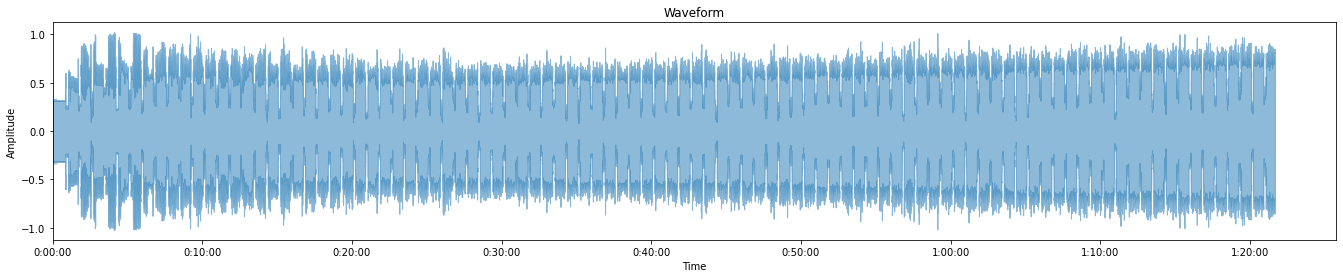

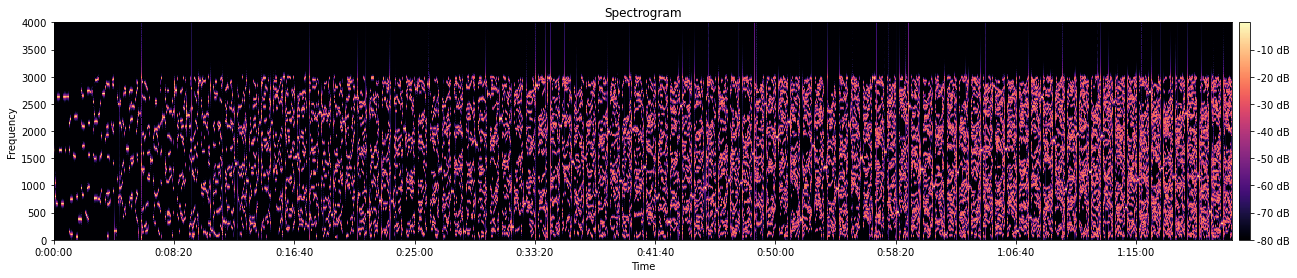

In [75]:
# middle = round(spectrogram_data_file.shape[1]*0.5)
# end = spectrogram_data_file.shape[1]
# spec_1 = spectrogram_data_file[:,0:middle]
# spec_2 = spectrogram_data_file[:,middle:end]
# plot_waveform_and_spectrogram_zones(audio_dict[3][0], spec_1, sr)
# plot_waveform_and_spectrogram_zones(audio_dict[3][0], spec_2, sr)
#spec_data_3_0 = librosa.amplitude_to_db(librosa.stft(audio_dict[3][0]), ref=np.max)
#plot_waveform_and_spectrogram_zones(audio_dict[3][0], spec_data_3_0, sr, filepath = "swarm_test", spec_width=25)
#plot_waveform_and_spectrogram_zones(audio_data, spectrogram_data_file, sr, filepath = "swarm_all", spec_width=25)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_646352\983497503.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_data = librosa.amplitude_to_db(librosa.stft(agents_data), ref=np.max)


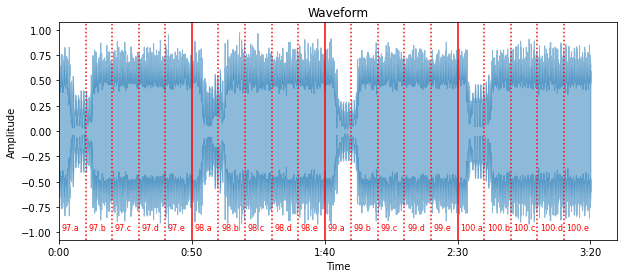

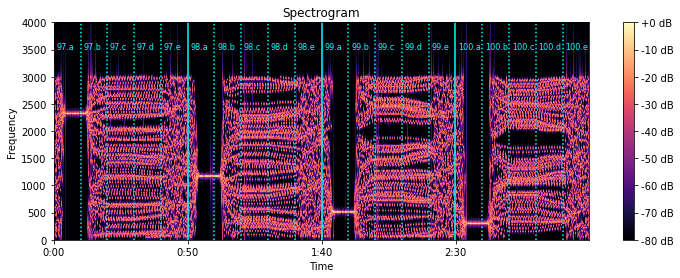

In [31]:
def plots_between_agents(from_agent, to_agent, fontsize_text = 10):
    agents_data = np.array([])

    for agent_i in range(from_agent, to_agent + 1):
        agents_data = np.concatenate([agents_data,np.concatenate(audio_dict[agent_i])])

    #agents_data = np.concatenate([np.concatenate(audio_dict[3]), np.concatenate(audio_dict[4])])
    spec_data = librosa.amplitude_to_db(librosa.stft(agents_data), ref=np.max)
    n_zones = (to_agent - from_agent + 1) * num_segments
    plot_waveform_and_spectrogram_zones(agents_data, spec_data, sr, split_zones=n_zones, start_agent_n=from_agent, filepath="swarm_"+str(from_agent)+"_"+str(to_agent), fontsize_text = fontsize_text)

init_agents = 97
final_agents = 100
step_agents = 4
fontsize_text = 8
for i in range(init_agents, final_agents + 1, step_agents):
    if i + step_agents - 1 <= final_agents:
        plots_between_agents(i, i + step_agents - 1, fontsize_text = fontsize_text)

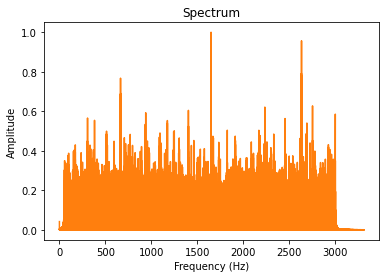

In [41]:
freq_bins, fft_data = plot_spectrum(audio_data, sr, limit_factor=0.3, filepath="swarm_all")

In [51]:
threshold = 0.7  # Set your desired threshold here
threshold_freq = 5

freqs = []
for freq, amplitude in zip(freq_bins, fft_data):
    if amplitude > threshold:
        freqs.append(freq)

if len(freqs) != 0:
    last_freq = freqs[0]
    last_counter = 1
    bins = [freqs[0]]
    for f in freqs:
        if f > last_freq + threshold_freq:
            bins[-1] /= last_counter
            bins.append(f)
            last_freq = f
            last_counter = 1
        else:
            bins[-1] += f
            last_counter += 1
    bins[-1] /= last_counter
    print(bins)


[664.1159472192799, 1647.8677921418616, 2630.9430990015903]
